# 1. Importation des librairies

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Chargement des données

In [32]:
data = pd.read_csv('Data/USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


# Separation des données

In [33]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [34]:
x= data['Avg. Area Income'].values
y= data['Price'].values

In [35]:
x

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367], shape=(5000,))

In [36]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

# Separation des données Train and Test

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split (x,y, test_size=0.25, random_state=40)

In [38]:
X_train = X_train.reshape(3750, 1)
X_test = X_test.reshape(1250, 1)

In [39]:
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_train shape : ", X_train.shape)
print("Y_test shape : ", X_test.shape)

X_train shape :  (3750, 1)
X_test shape :  (1250, 1)
Y_train shape :  (3750, 1)
Y_test shape :  (1250, 1)


# Construire un modèle

In [40]:
model_lineaire = LinearRegression()
model_lineaire.fit(X_train, Y_train)

LinearRegression()

# Faire la predition

In [41]:
y_score_predicts = model_lineaire.predict(X_test)

In [42]:
y_score_predicts

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [43]:
Y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [44]:
resultats = pd.DataFrame({"Y_test": Y_test, "y_score_predicts":y_score_predicts})
resultats

,Y_test,y_score_predicts
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


# Evaluation du model

In [45]:
print("MSE: ", mean_squared_error(Y_test, y_score_predicts))
print("r2_score: ", r2_score(Y_test, y_score_predicts))

MSE:  70345556190.3212
r2_score:  0.43322233931263276


# La visualisation de Résultat

<function matplotlib.pyplot.show(close=None, block=None)>

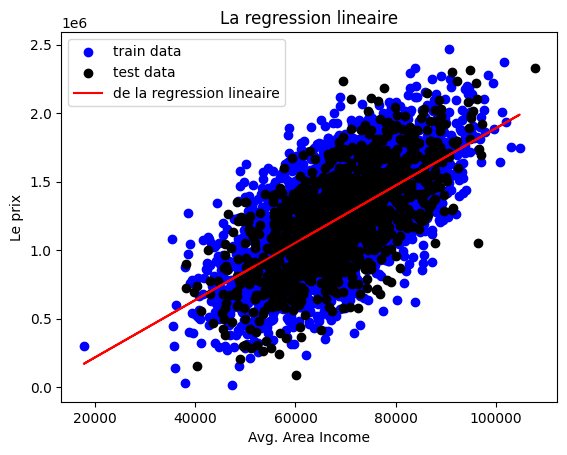

In [46]:
plt.scatter(X_train, Y_train, color="blue", label="train data")
plt.scatter(X_test, Y_test, color="black", label="test data")
plt.plot(X_train, model_lineaire.predict(X_train), color="red", label="de la regression lineaire")
plt.xlabel("Avg. Area Income")
plt.ylabel("Le prix")
plt.title("La regression lineaire")
plt.legend()
plt.show

# Prediction Simple

In [47]:
resultats = pd.DataFrame({"Y_test": Y_test, "y_score_predicts":y_score_predicts})
resultats

,Y_test,y_score_predicts
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


In [48]:
y_score_predicts

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [49]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

In [51]:
print(model_lineaire.predict([[600]]))

[-189757.30814435]
